In [66]:
import pandas as pd

In [67]:
import numpy as np

In [68]:
import matplotlib.pyplot as plt

# doc_list

In [69]:
doc_list = pd.read_csv("doctors_list_t8.csv")

In [70]:
pd.isnull(doc_list).sum()

Id             0
initial        0
href           0
name           0
specialties    0
address        0
zip            0
dtype: int64

In [71]:
doc_list.head()

,Id,initial,href,name,specialties,address,zip
0,3886560,a,/doctors/Dr_Enenge_ABodjedi,Enenge Abodjedi,['Psychiatrist'],"Stamford, CT 06902",06902
1,3886561,a,/doctors/Dr_Brady_AHearn,Brady J A'Hearn,['Pediatrician'],"Iowa City, IA 52242",52242
2,3886562,a,/doctors/Dr_Yousif_Arahim,Yousif A-Rahim,"['Gastroenterologist (digestive)', ' Internist']","Aiea, HI 96701",96701
3,3886563,a,/doctors/Dr_Noor_Al_Khori,Noor Al Khori,['Student'],"Grand Rapids, MI 49503",49503
4,3886564,a,/doctors/Dr_Salam_Al-Hafidh,Salam N Al-Hafidh,['Pediatrician'],"Richland Hills, TX 76180",76180


In [72]:
doc_list.tail()

,Id,initial,href,name,specialties,address,zip
1294498,5181716,i,/dentists/Dr_Micheal_Izzo,Michael A Izzo,['Dentist'],"Lincoln Park, MI 48146",48146
1294499,5181717,i,/doctors/Dr_Philip_Izzo,Philip M Izzo,['Psychiatrist'],"Media, PA 19063",19063
1294500,5181718,i,/dentists/Dr_Steven_Izzo,Steven R Izzo,['Dentist'],"Ridgewood, NY 11385",11385
1294501,5181719,i,/dentists/Dr_Steven_Izzo_2,Steven Izzo,['Dentist'],"Brooklyn, NY 11228",11228
1294502,5181720,i,/doctors/Dr_Timothy_Izzo,Timothy J Izzo,"['Family Practitioner', ' Primary Care Doctor']","Grand Ledge, MI 48837",48837


In [73]:
np.shape(doc_list) # see the number of rows and columns

(1294503, 7)

- We have 1294503 doctors in the data set

In [74]:
r = lambda x: x.lstrip("/") 

In [75]:
doc_list.href = doc_list.href.apply(r) # split the href into title and the prof_name

In [76]:
doc_list['title'], doc_list['prof_name'] = doc_list['href'].str.split('/',1).str

In [77]:
doc_list = doc_list.drop('href',1)

In [78]:
doc_list.tail() 

,Id,initial,name,specialties,address,zip,title,prof_name
1294498,5181716,i,Michael A Izzo,['Dentist'],"Lincoln Park, MI 48146",48146,dentists,Dr_Micheal_Izzo
1294499,5181717,i,Philip M Izzo,['Psychiatrist'],"Media, PA 19063",19063,doctors,Dr_Philip_Izzo
1294500,5181718,i,Steven R Izzo,['Dentist'],"Ridgewood, NY 11385",11385,dentists,Dr_Steven_Izzo
1294501,5181719,i,Steven Izzo,['Dentist'],"Brooklyn, NY 11228",11228,dentists,Dr_Steven_Izzo_2
1294502,5181720,i,Timothy J Izzo,"['Family Practitioner', ' Primary Care Doctor']","Grand Ledge, MI 48837",48837,doctors,Dr_Timothy_Izzo


In [79]:
doc_list_dupli = doc_list[doc_list.duplicated(['prof_name'], keep=False)] # select the peroson who is dupicated in the list table

In [80]:
doc_list_dupli_name = set(doc_list_dupli.prof_name)

In [81]:
len(doc_list_dupli_name)

0

- There is no duplicated person in doc_list table 

In [82]:
doc_list.title.value_counts()

doctors     1095990
dentists     198513
Name: title, dtype: int64

There are 1095990 doctors and 198513 dentists

In [83]:
import re

In [84]:
rs = lambda x: re.sub('[^a-zA-Z\']+', ' ', x)

In [85]:
doc_list.specialties = doc_list.specialties.apply(rs) # clean the specialties columns

In [86]:
doc_list.head()

,Id,initial,name,specialties,address,zip,title,prof_name
0,3886560,a,Enenge Abodjedi,'Psychiatrist',"Stamford, CT 06902",06902,doctors,Dr_Enenge_ABodjedi
1,3886561,a,Brady J A'Hearn,'Pediatrician',"Iowa City, IA 52242",52242,doctors,Dr_Brady_AHearn
2,3886562,a,Yousif A-Rahim,'Gastroenterologist digestive ' ' Internist',"Aiea, HI 96701",96701,doctors,Dr_Yousif_Arahim
3,3886563,a,Noor Al Khori,'Student',"Grand Rapids, MI 49503",49503,doctors,Dr_Noor_Al_Khori
4,3886564,a,Salam N Al-Hafidh,'Pediatrician',"Richland Hills, TX 76180",76180,doctors,Dr_Salam_Al-Hafidh


In [87]:
np.shape(doc_list)

(1294503, 8)

In [88]:
words = []
for i in doc_list.specialties:
    words += [i]

In [89]:
words_clean = re.sub('[^a-zA-Z]+', '/', str(words))

In [90]:
#count the specialties
specialist = {}
wordsplit = words_clean.split('/')
for word in wordsplit:
    if word in specialist :
        specialist[word]=specialist[word]+1
    else:
        specialist[word] = 1
     

In [91]:
sorted(specialist.items(), key=lambda x: x[1],reverse=True)

[('Specialist', 229772),
 ('Internist', 222313),
 ('Dentist', 198510),
 ('Care', 151698),
 ('Practitioner', 147143),
 ('Primary', 139732),
 ('Doctor', 139732),
 ('Family', 131692),
 ('Surgical', 100403),
 ('Pediatrician', 92566),
 ('Psychologist', 87175),
 ('Psychiatrist', 64219),
 ('Student', 56887),
 ('Obstetrician', 52807),
 ('Gynecologist', 52807),
 ('OB', 52807),
 ('GYN', 52807),
 ('Anesthesiologist', 52793),
 ('pain', 52793),
 ('control', 52793),
 ('Surgeon', 49230),
 ('Radiologist', 48060),
 ('Emergency', 46557),
 ('Physician', 46557),
 ('Orthopaedic', 31876),
 ('Cardiologist', 31593),
 ('heart', 31593),
 ('Oncology', 26454),
 ('Medicine', 26209),
 ('Pediatric', 23938),
 ('Pathologist', 23725),
 ('Ophthalmologist', 23133),
 ('eyes', 23133),
 ('cancer', 22076),
 ('Neurologist', 20461),
 ('brain', 20461),
 ('nervous', 20461),
 ('system', 20460),
 ('Gastroenterologist', 16900),
 ('digestive', 16900),
 ('General', 15451),
 ('Dermatologist', 14867),
 ('skin', 14867),
 ('Pulmonologist

the TOP 10 	specialties are:
 - ('Internist', 222313),
 - ('Dentist', 198510),
 - ('PrimaryCareDoctor', 139732),
 - ('FamilyPractitioner', 131692),
 - ('SurgicalSpecialist', 100403),
 - ('Pediatrician', 92566),
 - ('Psychologist', 87175),
 - ('Psychiatrist', 57374),
 - ('Student', 56887),
 - ('ObstetricianGynecologistOBGYN', 52807)

In [92]:
specialist_table = pd.DataFrame.from_dict(specialist, orient='index')

# doc_panel

In [93]:
doc_panel = pd.read_csv("doctors_panel_t8.csv")

In [94]:
doc_panel.head()

,Id,href,years_of_exp,overall_rating,n_ratings,n_reviews,avg_wating,Ease_of_Appointment,Promptness,Courteous_Staff,...,Caring_Manner,Pain_Minimized,Satisfaction,n_5,n_4,n_3,n_2,n_1,address,crawl_date
0,9206066,/dentists/Dr_Aamir_M_Sheikh,10.0,0.0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9105 All Saints Rd, Laurel, MD, 20723",2016-09-06 20:53:49
1,9206067,/dentists/Dr_Aamir_Shah_2,NaN,4.5,3,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7872 Walker St, La Palma, CA, 90623",2016-09-06 20:53:51
2,9206068,/dentists/Dr_Aalie_Sagar,NaN,3.5,3,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10842 Potranco Rd, San Antonio, TX, 78251",2016-09-06 20:53:54
3,9206069,/dentists/Dr_Aan_Litvinov,NaN,1.0,1,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1740 Culver Rd, Rochester, NY, 14609",2016-09-06 20:53:55
4,9206070,/dentists/Dr_Aarika_Anderson_Elter,NaN,5.0,1,1,NaN,3.5,NaN,NaN,...,5.0,5.0,NaN,1.0,0.0,0.0,0.0,0.0,"1708 E 44th St, Tacoma, WA, 98404",2016-09-06 20:54:01


In [95]:
np.shape(doc_panel)

(1293682, 27)

In [96]:
doc_panel.href = doc_panel.href.apply(r) # split the href into title and the prof_name
doc_panel['title'], doc_panel['prof_name'] = doc_panel['href'].str.split('/',1).str
doc_panel = doc_panel.drop('href',1)

In [97]:
doc_panel.tail()

,Id,years_of_exp,overall_rating,n_ratings,n_reviews,avg_wating,Ease_of_Appointment,Promptness,Courteous_Staff,Accurate_Diagnosis,...,Satisfaction,n_5,n_4,n_3,n_2,n_1,address,crawl_date,title,prof_name
1293677,10499745,25.0,4.5,21,11,33 minutes,5.0,4.0,4.5,5.0,...,NaN,16.0,2.0,1.0,2.0,0.0,"10293 N 92nd St, Scottsdale, AZ, 85258",2016-09-16 20:03:43,doctors,Dr_Ramy_Doss
1293678,10499746,11.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"60 Hospital Rd, Leominster, MA, 01453",2016-09-16 20:03:45,doctors,Dr_Ramzi_Khazen
1293679,10499747,37.0,3.0,2,1,10 minutes,5.0,3.5,5.0,5.0,...,NaN,1.0,0.0,0.0,0.0,1.0,"200 1st St Sw, Rochester, MN, 55905",2016-09-16 20:03:45,doctors,Dr_Randall_Edson
1293680,10499748,26.0,4.5,18,1,17 minutes,4.0,4.5,4.5,4.5,...,NaN,14.0,1.0,0.0,0.0,3.0,"1155 Jadwin Ave, Richland, WA, 99352",2016-09-16 20:03:47,doctors,Dr_Randall_Farrar
1293681,10499749,49.0,5.0,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"3909 Woodley Rd, Toledo, OH, 43606",2016-09-16 20:03:48,doctors,Dr_Randall_Finken


In [98]:
doc_panel.columns #check the column name

Index(['Id', 'years_of_exp', 'overall_rating', 'n_ratings', 'n_reviews',
       'avg_wating', 'Ease_of_Appointment', 'Promptness', 'Courteous_Staff',
       'Accurate_Diagnosis', 'Bedside_Manner', 'Spends_Time_with_Me',
       'Follows_Up_After_Visit', 'Comfortable_Office', 'Cleanliness',
       'Advanced_Technology', 'Caring_Manner', 'Pain_Minimized',
       'Satisfaction', 'n_5', 'n_4', 'n_3', 'n_2', 'n_1', 'address',
       'crawl_date', 'title', 'prof_name'],
      dtype='object')

In [99]:
doc_panel.isnull().values.any()

True

In [100]:
doc_panel.isnull().sum() # check the null value

Id                              0
years_of_exp               432050
overall_rating                  0
n_ratings                       0
n_reviews                       0
avg_wating                1000733
Ease_of_Appointment        859795
Promptness                 895034
Courteous_Staff            893877
Accurate_Diagnosis         891816
Bedside_Manner             891785
Spends_Time_with_Me        891773
Follows_Up_After_Visit     897890
Comfortable_Office        1259010
Cleanliness               1259017
Advanced_Technology       1259167
Caring_Manner             1258985
Pain_Minimized            1259259
Satisfaction              1259697
n_5                        844215
n_4                        844215
n_3                        844215
n_2                        844215
n_1                        844216
address                         0
crawl_date                      0
title                           0
prof_name                       0
dtype: int64

In [101]:
doc_panel_dupli = doc_panel[doc_panel.duplicated(['prof_name'], keep=False)] # select the peroson who is dupicated in the panle table

In [148]:
doc_panel_dupli 

,Id,years_of_exp,overall_rating,n_ratings,n_reviews,avg_wating,Ease_of_Appointment,Promptness,Courteous_Staff,Accurate_Diagnosis,...,Satisfaction,n_5,n_4,n_3,n_2,n_1,address,crawl_date,title,prof_name
19216,9225282,22.0,5.0,324,323,NaN,5.0,NaN,NaN,NaN,...,5.0,310.0,12.0,0.0,2.0,0.0,"3330 Park St, Grove City, OH, 43123",2016-09-08 17:34:57,dentists,Dr_Brian_E_Woodard
19311,9225377,22.0,5.0,324,323,NaN,5.0,NaN,NaN,NaN,...,5.0,310.0,12.0,0.0,2.0,0.0,"3330 Park St, Grove City, OH, 43123",2016-09-08 17:35:26,dentists,Dr_Brian_E_Woodard
26428,9232494,14.0,5.0,374,373,NaN,1.5,NaN,NaN,NaN,...,1.0,333.0,28.0,0.0,7.0,6.0,"4601 Park Rd, Charlotte, NC, 28209",2016-09-08 18:10:21,dentists,Dr_Charles_Payet
26518,9232584,14.0,5.0,374,373,NaN,1.5,NaN,NaN,NaN,...,1.0,333.0,28.0,0.0,7.0,6.0,"4601 Park Rd, Charlotte, NC, 28209",2016-09-08 18:10:51,dentists,Dr_Charles_Payet
50853,9256919,20.0,4.5,456,450,NaN,4.5,NaN,NaN,NaN,...,3.0,363.0,34.0,1.0,39.0,19.0,"21301 Kuykendahl Rd, Spring, TX, 77379",2016-09-08 20:17:41,dentists,Dr_Emily_Graham
50944,9257010,20.0,4.5,456,450,NaN,4.5,NaN,NaN,NaN,...,3.0,363.0,34.0,1.0,39.0,19.0,"21301 Kuykendahl Rd, Spring, TX, 77379",2016-09-08 20:18:14,dentists,Dr_Emily_Graham
101851,9307917,NaN,5.0,425,423,NaN,NaN,NaN,NaN,NaN,...,NaN,421.0,3.0,0.0,1.0,0.0,"450 Sutter St, San Francisco, CA, 94108",2016-09-09 00:12:50,dentists,Dr_Kathy_Noordeh
101920,9307986,NaN,5.0,425,423,NaN,NaN,NaN,NaN,NaN,...,NaN,421.0,3.0,0.0,1.0,0.0,"450 Sutter St, San Francisco, CA, 94108",2016-09-09 00:13:18,dentists,Dr_Kathy_Noordeh
119901,9325967,NaN,5.0,588,586,NaN,5.0,NaN,NaN,NaN,...,5.0,545.0,38.0,0.0,3.0,2.0,"7515 Greenville Ave, Ste 810, Dallas, TX, 75231",2016-09-09 01:28:09,dentists,Dr_Mary_Swift
120010,9326076,NaN,5.0,588,586,NaN,5.0,NaN,NaN,NaN,...,5.0,545.0,38.0,0.0,3.0,2.0,"7515 Greenville Ave, Ste 810, Dallas, TX, 75231",2016-09-09 01:28:38,dentists,Dr_Mary_Swift


In [102]:
doc_panel_dupli_name = set(doc_panel_dupli.prof_name)

In [103]:
len(doc_panel_dupli_name) # There are 174 persons who are dupicated

174

In [104]:
doc_panel_dupli.prof_name.value_counts() # the name list of duplicated persons 

Dr_Allan_Sawyer           84
Dr_Francis_Clark           6
Dr_Shane_Matt              3
Dr_William_Romero          3
Dr_Patricia_Cleavinger     3
Dr_Joseph_B_Wilson         3
Dr_Scott_M_Schlesinger     3
Dr_Terry_Test              3
Dr_Ralph_Pearlman          3
Dr_Lama_Tolaymat           2
Dr_Bruce_S_Hoffman         2
Dr_Carl_Harrell            2
Dr_Luke_Nordquist          2
Dr_Michael_J_Hall_8        2
Dr_Shawn_Guerin            2
Dr_Linda_C_Huang           2
Dr_Ramtin_Kassir           2
Dr_William_Jacobsen        2
Dr_Eugene_Gosy             2
Dr_Michael_Steuer          2
Dr_Siamak_Okhovat          2
Dr_Susan_A_Sheets          2
Dr_Peter_Accetta           2
Dr_Warren_Ravner           2
Dr_Wiyatta_Freeman         2
Dr_Mark_M_Williams         2
Dr_Mark_D_Epstein          2
Dr_Edward_J_Kaplan         2
Dr_Sam_Gershenbaum         2
Dr_Geoffrey_Kwitko         2
                          ..
Dr_Robert_Shick            2
Dr_Timothy_Stirneman       2
Dr_Thomas_F_Ford           2
Dr_Wilbur_Hah 

- Most of the persons are not dupicated in the table ( There is 1293682 persons in this table)
- There is 174 duplicated persons 
- "Dr_Allan_Sawyer" is duplicated 84 times
- Most duplicated persons are  duplicated twice

# campare list and panel table

In [105]:
namelist = list(doc_list.prof_name)
len(namelist)

1294503

In [106]:
checklist = list(doc_panel.prof_name)
len(checklist)

1293682

In [107]:
len(set(checklist))

1293415

In [108]:
doc_inTwoTable = list(set(checklist).intersection(namelist))

In [109]:
len(doc_inTwoTable)

1292734

In [110]:
miss_inPanel = set(checklist)-set(doc_inTwoTable)

In [111]:
len(miss_inPanel)

681

In [112]:
miss_inList = set(namelist) - set(doc_inTwoTable)

In [113]:
len(miss_inList)

1769

- There are 1294503 unique persons in list table.
- There are 1293415 unique persons in panel table.
- The intersection of list table and panel table 1292734 which is less than the number of unique persons in these two table. For these two tables, some parts of them miss in the intersection data set.

# reviews_panel

In [114]:
rew_panel = pd.read_csv("reviews_panel_t8.csv")

In [115]:
rew_panel.href = rew_panel.href.apply(r) # split the href into title and the prof_name
rew_panel['title'], rew_panel['prof_name'] = rew_panel['href'].str.split('/',1).str
rew_panel = rew_panel.drop('href',1)

In [116]:
rew_panel.tail()

,Id,review_id,overall_rating,Ease_of_Appointment,Promptness,Courteous_Staff,Accurate_Diagnosis,Bedside_Manner,Spends_Time_with_Me,Follows_Up_After_Visit,...,Caring_Manner,Pain_Minimized,Satisfaction,date,reviewer,title,content,helpful_vote,crawl_date,prof_name
1796199,14819364,19546944,5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,2011-07-13,NaN,doctors,Love Dr. Army Doss. He saved my life- a hea...,NaN,2016-09-16 20:03:44,Dr_Ramy_Doss
1796200,14819365,18196930,5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,2008-06-23,Cheri R,doctors,I met Dr. Doss during a very stressful time an...,NaN,2016-09-16 20:03:44,Dr_Ramy_Doss
1796201,14819366,18233638,5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,2008-04-30,THERESA DALTON,doctors,IF IT WEREN'T FOR DR. DOSS' ACCURATE DIAGNOSIS...,NaN,2016-09-16 20:03:44,Dr_Ramy_Doss
1796202,14819367,19725098,5,5.0,4.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,NaN,2011-11-21,NaN,doctors,dr. edson is as good as it gets for being pers...,1.0,2016-09-16 20:03:45,Dr_Randall_Edson
1796203,14819368,31104374,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,...,NaN,NaN,NaN,2015-12-19,NaN,doctors,Great Doc! Really cares.,NaN,2016-09-16 20:03:47,Dr_Randall_Farrar


In [149]:
np.shape(rew_panel)

(1796204, 23)

In [142]:
rew_panel.columns #check the columns

Index(['Id', 'review_id', 'overall_rating', 'Ease_of_Appointment',
       'Promptness', 'Courteous_Staff', 'Accurate_Diagnosis', 'Bedside_Manner',
       'Spends_Time_with_Me', 'Follows_Up_After_Visit', 'Comfortable_Office',
       'Cleanliness', 'Advanced_Technology', 'Caring_Manner', 'Pain_Minimized',
       'Satisfaction', 'date', 'reviewer', 'title', 'content', 'helpful_vote',
       'crawl_date', 'prof_name'],
      dtype='object')

In [117]:
rew_panel.isnull().values.any()

True

In [118]:
rew_panel.isnull().sum() # check the null value

Id                              0
review_id                       0
overall_rating                  0
Ease_of_Appointment        164657
Promptness                 259889
Courteous_Staff            238039
Accurate_Diagnosis         243427
Bedside_Manner             250964
Spends_Time_with_Me        236403
Follows_Up_After_Visit     334522
Comfortable_Office        1735722
Cleanliness               1735977
Advanced_Technology       1736373
Caring_Manner             1735730
Pain_Minimized            1736693
Satisfaction              1737931
date                            0
reviewer                  1090147
title                           0
content                         2
helpful_vote              1084028
crawl_date                      0
prof_name                       0
dtype: int64

In [143]:
reviews_forEach = rew_panel.prof_name.value_counts() # Check how many reviews for each doctor

In [144]:
reviews_forEach

Dr_Mary_Swift              586
Dr_Allan_Sawyer            526
Dr_Patricia_Cleavinger     488
Dr_Emily_Graham            450
Dr_Kathy_Noordeh           423
Dr_Shane_Matt              423
Dr_Terry_Test              379
Dr_Charles_Payet           373
Dr_Shawn_Guerin            347
Dr_Brian_E_Woodard         323
Dr_William_Romero          323
Dr_Joseph_B_Wilson         304
Dr_George_Strickland_2     299
Dr_Roger_Hanawalt          296
Dr_Robert_A_Rosenfeld_2    292
Dr_Nancy_Archibald         291
Dr_Andrew_Yap              289
Dr_Darryl_Wu               279
Dr_Francis_Clark           279
Dr_Mitchell_Terk           269
Dr_Allison_Watts           266
Dr_Scott_M_Schlesinger     265
Dr_Bradford_Boyd           261
Dr_Ming_Wang               250
Dr_Ralph_Pearlman          249
Dr_Sidney_Wu               246
Dr_Jeff_Livingston         233
Dr_Jay_Gottlieb            230
Dr_Melissa_Tuft            228
Dr_Robert_Feldman          223
                          ... 
Dr_Aamir_S_Malik             1
Dr_Bill_

In [145]:
reviews_forEach_array = np.array(reviews_forEach)

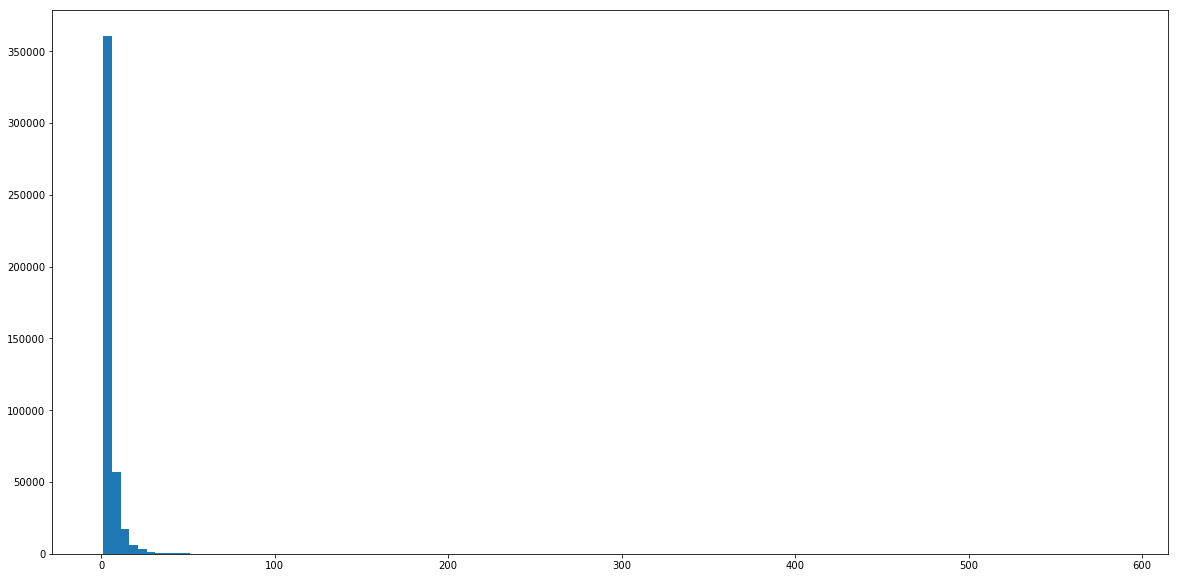

In [146]:
plt.figure(figsize=(20,10))
plt.hist(reviews_forEach_array,bins=np.arange(reviews_forEach_array.min(), reviews_forEach_array.max()+5,5))
plt.show()

- The highest number of reviews for one person is 586.
- The most of persons have only one review.

# campare doctor panel and reviews table

In [125]:
panel_id = list(doc_panel.Id) # select id from panel table

In [126]:
len(set(panel_id))

1293682

In [138]:
# select id and review id form reviews table
#review_id = list(rew_panel.Id)
review_id = list(rew_panel.review_id)

In [139]:
len(set(review_id))

1796204

In [140]:

Id_inTwoTable = list(set(panel_id).intersection(review_id))

In [141]:
len(set(Id_inTwoTable))

0

- The id and review id in reviews table have none business with the id in panel table.

In [131]:
review_name = list(rew_panel.prof_name)

In [132]:
doc_inTwoTable_rew = list(set(checklist).intersection(review_name))

In [134]:
len(doc_inTwoTable_rew)

448943

In [136]:
len(set(review_name))

448943

In [2]:
# the doctor name in the reviews table also exist in the panel table.